### Conditions given

(10, 512, 512)
(10, 514, 514)


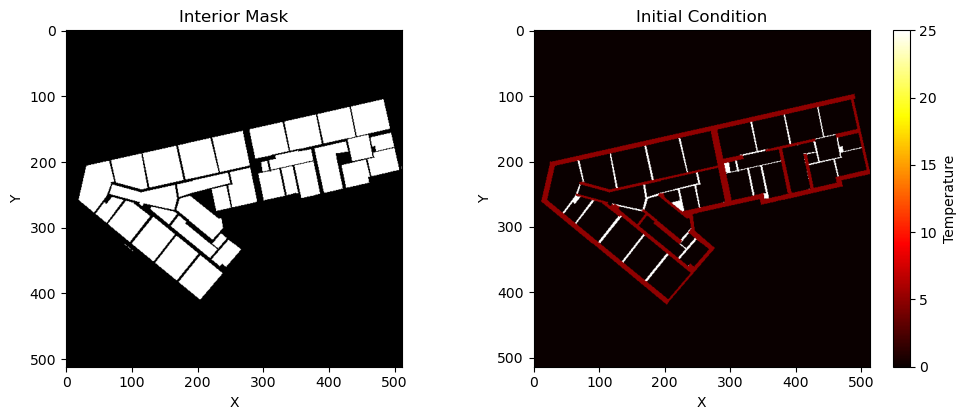

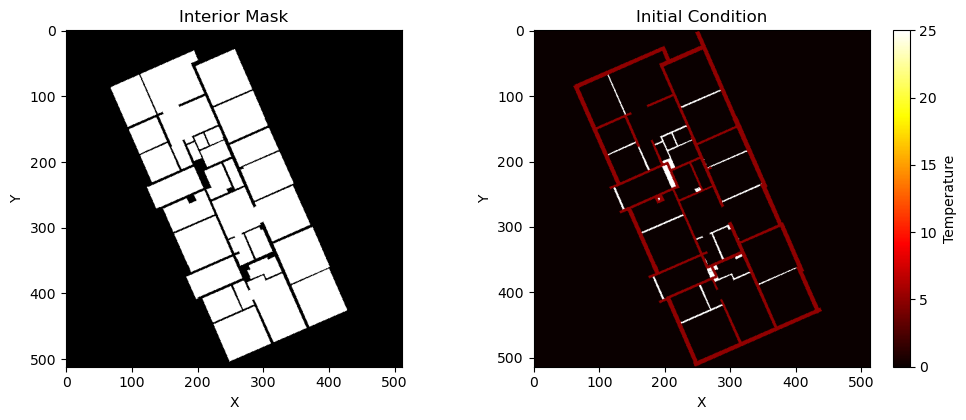

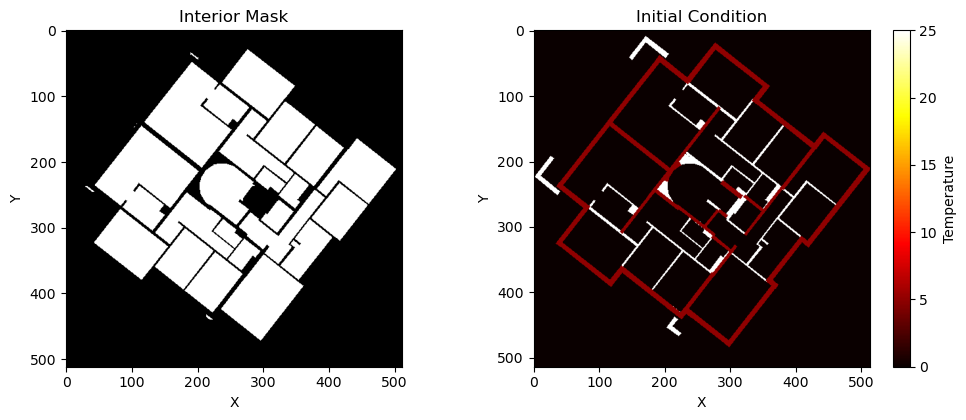

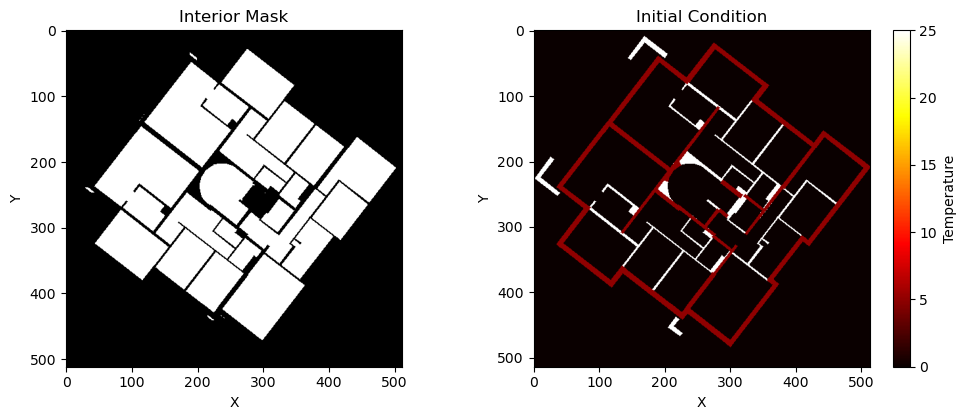

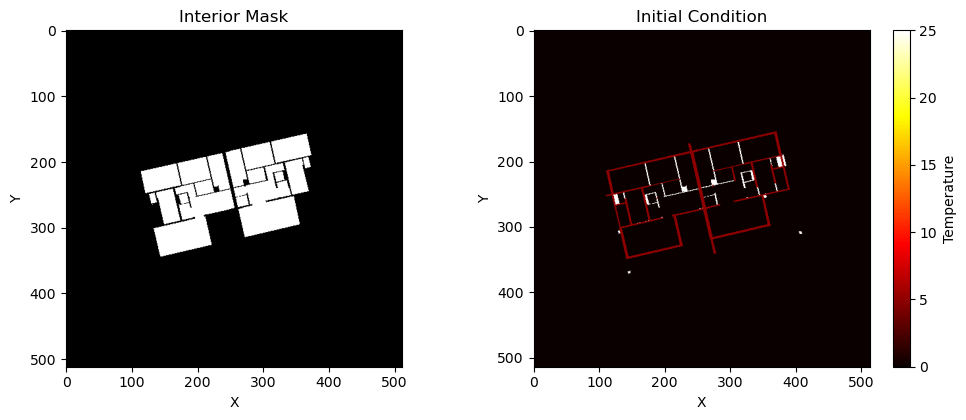

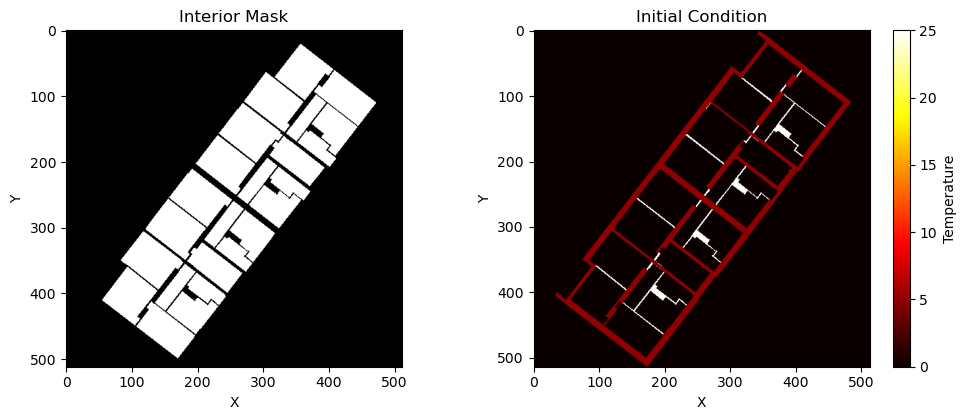

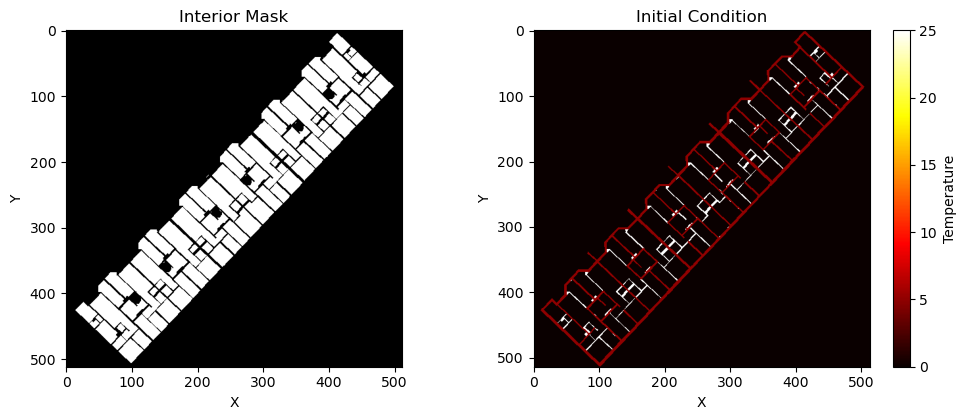

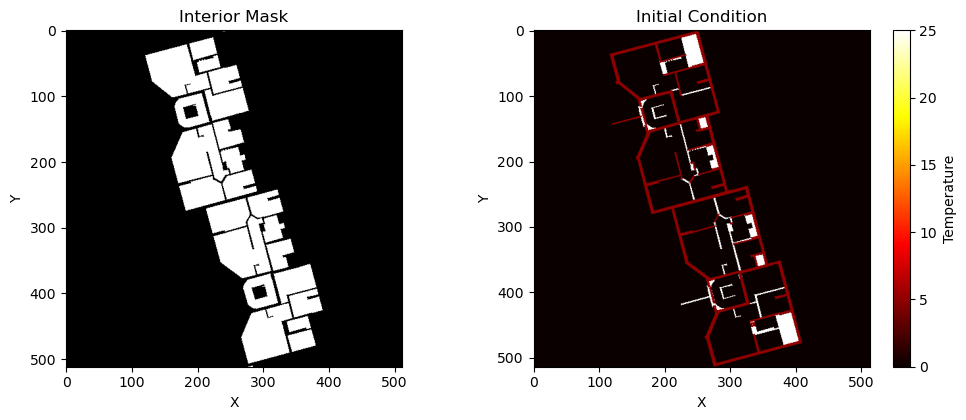

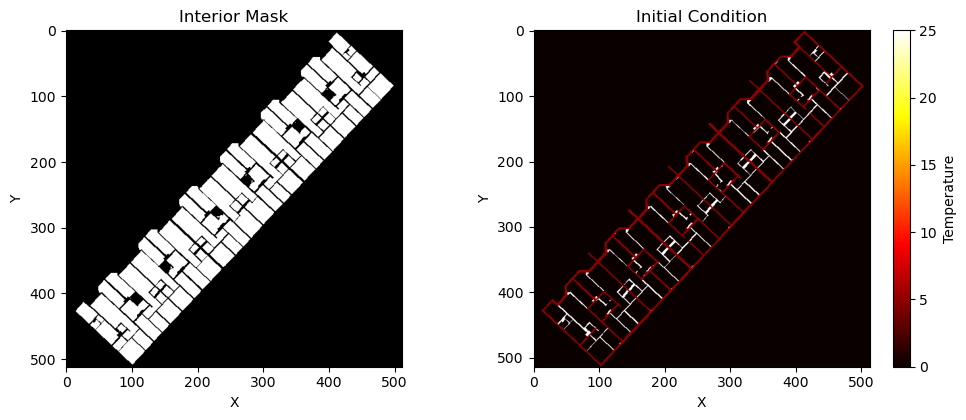

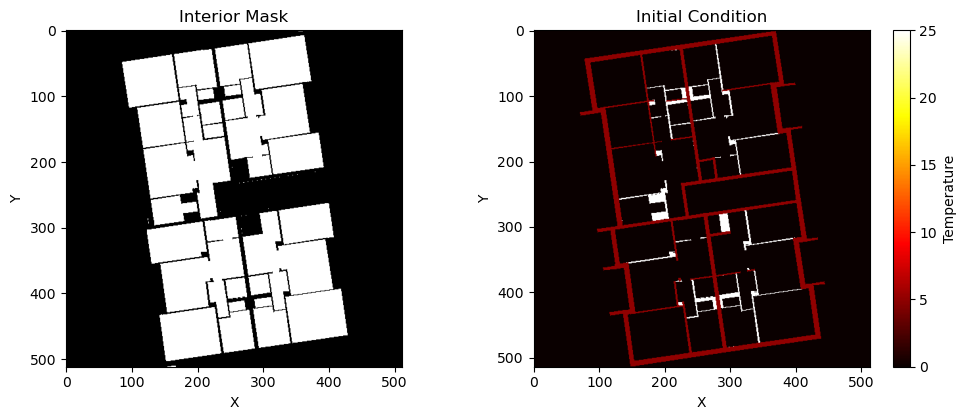

In [3]:
import numpy as np
import matplotlib.pyplot as plt

all_u_directory = r"/Users/lottealstrup/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Studie/Intro to AI/Github/Python_and_HPC/"

interior_mask = f'{all_u_directory}interior_masks.npy'
initial_condition = f'{all_u_directory}initial_conditions.npy'

#Shapes
print(np.load(interior_mask).shape) # (512, 512)
print(np.load(initial_condition).shape) # (514, 514)


# Load the intial condition and interior mask
load_interior = np.load(interior_mask, mmap_mode='r')
load_initial = np.load(initial_condition, mmap_mode='r')


for i in range(load_interior.shape[0]):
    # Create subplots for the two start grids
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Adjusted figsize to make plots smaller

    # Plot interior mask
    axs[0].imshow(load_interior[i, :, :], cmap='gray')
    axs[0].set_title('Interior Mask')
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')

    # Plot initial condition
    im1 = axs[1].imshow(load_initial[i, :, :], cmap='hot')
    axs[1].set_title('Initial Condition')
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('Y')
    fig.colorbar(im1, ax=axs[1], orientation='vertical', label='Temperature')

    plt.tight_layout(pad=0)  # Reduced padding to make space between plots smaller
    
    plt.show()




### Initial Results

(10, 514, 514)


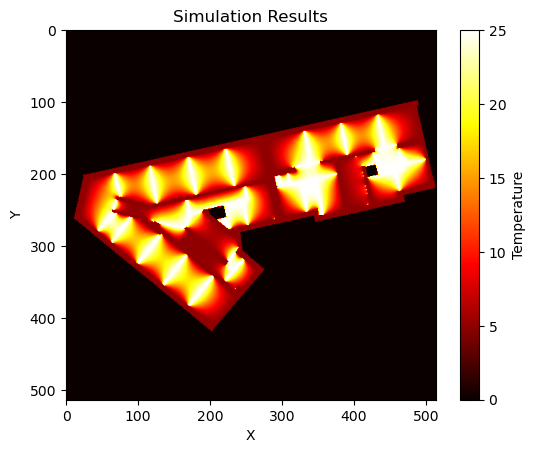

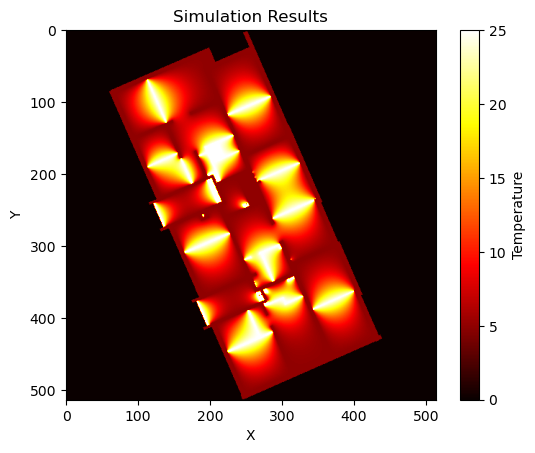

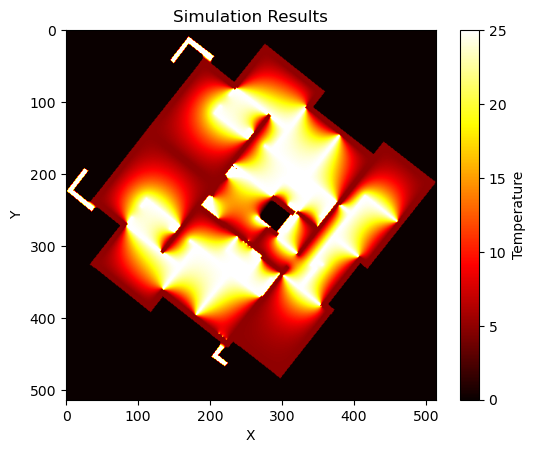

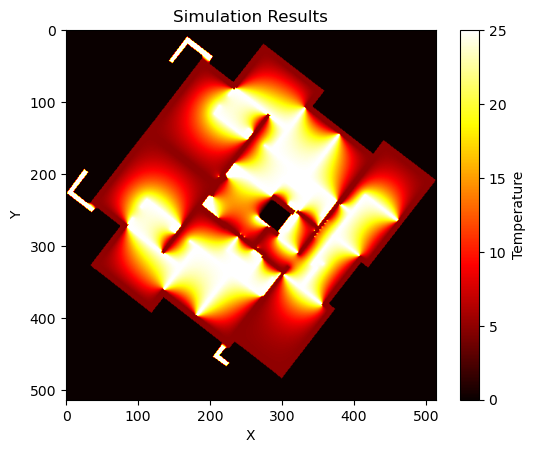

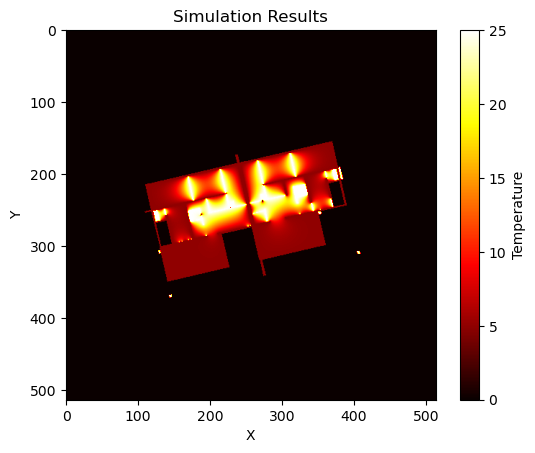

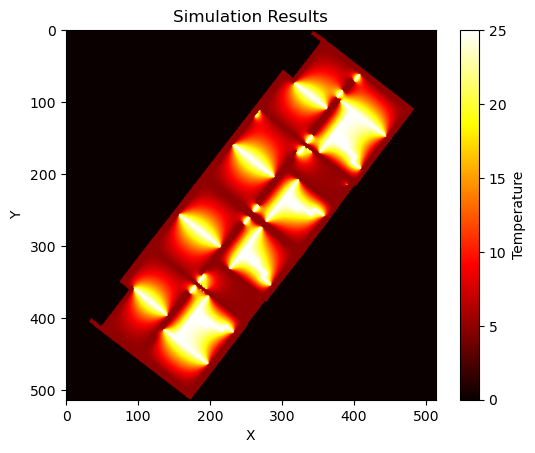

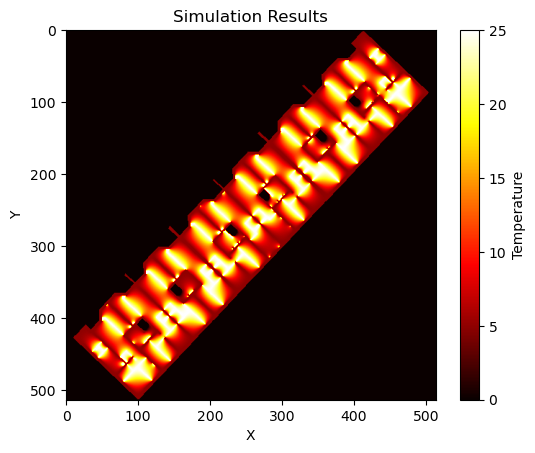

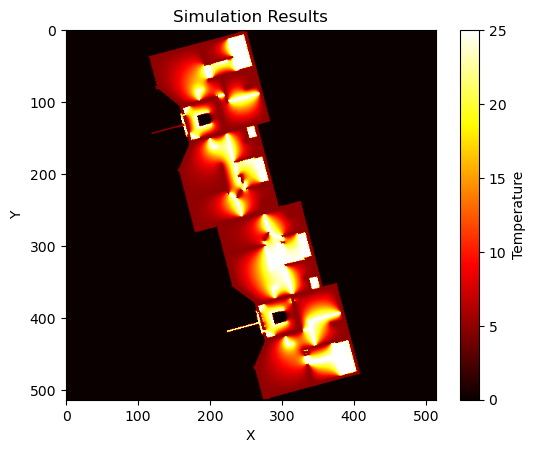

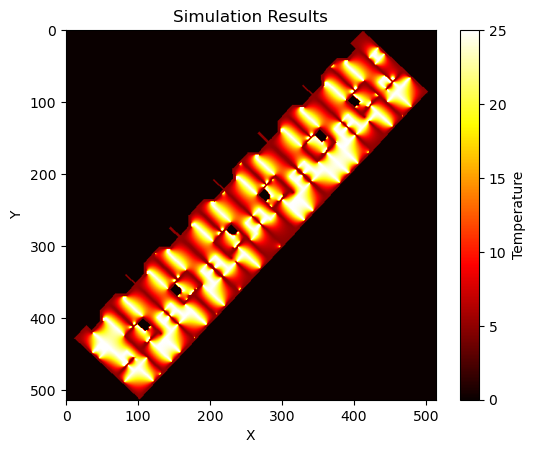

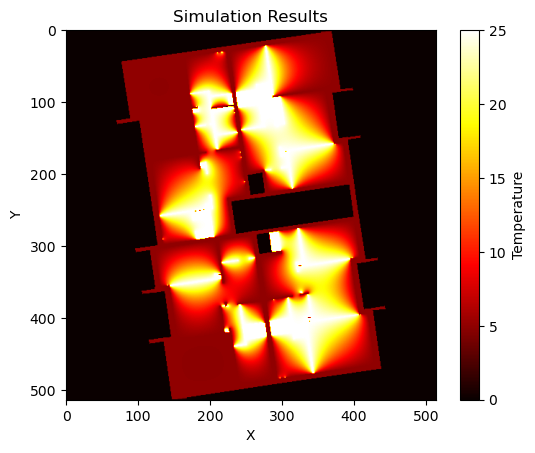

In [4]:
results = f'{all_u_directory}simulate_results_initial.npy'
print(np.load(results).shape) # (3, 514, 514)
load_results = np.load(results, mmap_mode='r')

for i in range(load_results.shape[0]):
    # Plot simulation results
    plt.imshow(load_results[i, :, :], cmap='hot')
    plt.colorbar(label='Temperature')
    plt.title(f'Simulation Results')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()